# Script: Logistic Regression

In [31]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statistics import mode
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 

In [32]:
# import data
train = pd.read_csv("Titanic_train.csv")
test  = pd.read_csv('Titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# check missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

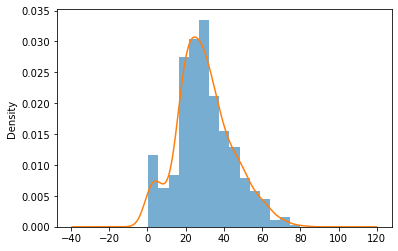

In [34]:
# check age distribution
train["Age"].hist(bins=15, density=True, alpha=0.6)
train["Age"].plot(kind='density')
plt.show()

In [35]:
# preparing data using one-hot encode to generate 
ports = pd.get_dummies(train.Embarked , prefix='Embarked')
train = train.join(ports)
train.drop(['Embarked'], axis=1, inplace=True)

train.Sex = train.Sex.map({'male':0, 'female':1})

y = train.Survived.copy()
X = train.drop(['Survived'], axis=1)

# drop cols
X.drop(['PassengerId'], axis=1, inplace=True)
X.drop(['Name'], axis=1, inplace=True) 
X.drop(['Ticket'], axis=1, inplace=True) 
X.drop(['Cabin'], axis=1, inplace=True) 

# filling age missing values with median since the data is (right) skewed
X.Age.fillna(X.Age.median(), inplace=True)

In [36]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# modeling and check the accuracy
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8251121076233184


In [37]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[125  15]
 [ 24  59]]


In [38]:
# Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       140
           1       0.80      0.71      0.75        83

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223

